# Grover's Algorithm

## Classical example
Find winning number 7 in given list.

In [1]:
# random numbers
my_list = [1,3,5,2,4,9,5,8,0,7,6]

In [2]:
def the_oracle(my_input):
    winner = 7
    if my_input is winner:
        response = True
    else:
        response = False
    return response

In [3]:
for index, trial_number in enumerate(my_list):
    if the_oracle(trial_number) is True:
        print('Winner found at index %i' %(index))
        print('%i calls to the Oracle used' %(index+1))
        break

Winner found at index 9
10 calls to the Oracle used


## Grover's algorithm
Find winning state $\left|11\right>$.

In [4]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

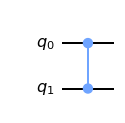

In [5]:
# define the oracle circuit
oracle = QuantumCircuit(2, name='oracle')
oracle.cz(0, 1)
oracle.to_gate()
oracle.draw(output='mpl')

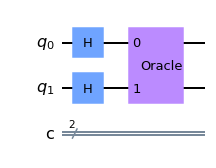

In [6]:
backend = Aer.get_backend('statevector_simulator')
grover_circ = QuantumCircuit(2, 2)
grover_circ.h([0, 1])
grover_circ.append(oracle, [0, 1])
grover_circ.draw(output='mpl')

In [7]:
job = execute(grover_circ, backend)
result = job.result()

sv = result.get_statevector()
np.around(sv, 2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

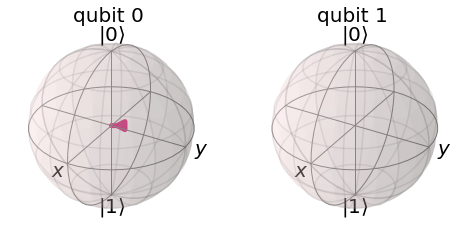

In [8]:
from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(sv)

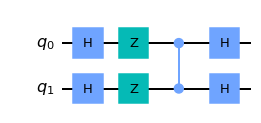

In [9]:
reflection = QuantumCircuit(2, name='reflection')
reflection.h([0, 1])
reflection.z([0, 1])
reflection.cz(0, 1)
reflection.h([0, 1])
reflection.to_gate()
reflection.draw(output='mpl')

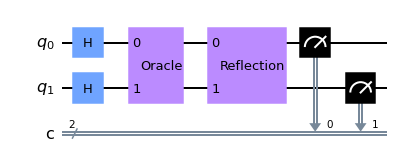

In [10]:
backend = Aer.get_backend('statevector_simulator')
grover_circ = QuantumCircuit(2, 2)
grover_circ.h([0, 1])
grover_circ.append(oracle, [0, 1])
grover_circ.append(reflection, [0, 1])
grover_circ.measure([0, 1], [0, 1])
grover_circ.draw(output='mpl')

In [11]:
job = execute(grover_circ, backend, shots=1)
result = job.result()
result.get_counts()

{'11': 1}